### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf

tf.set_random_seed(42)

In [2]:
tf.__version__

'1.14.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [47]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [54]:
import numpy 
numpy.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [55]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
('First 5 examples now are: ', array([9, 0, 0, 3, 0], dtype=uint8))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

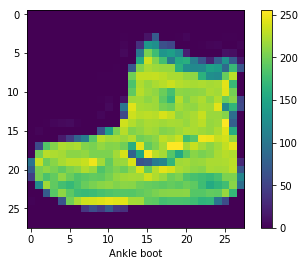

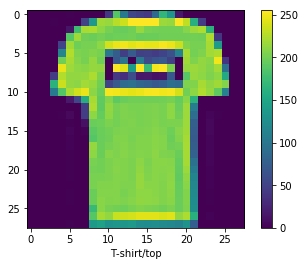

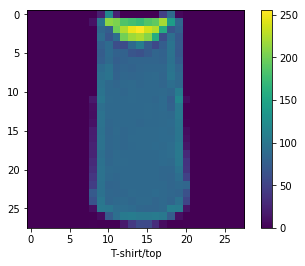

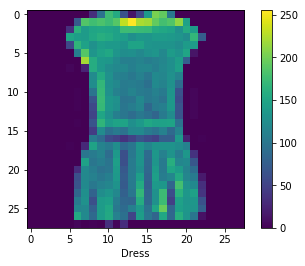

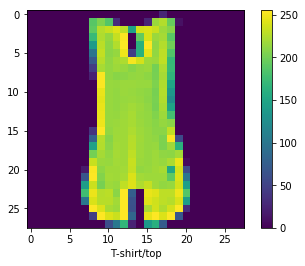

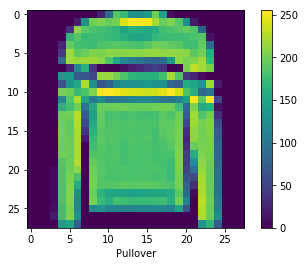

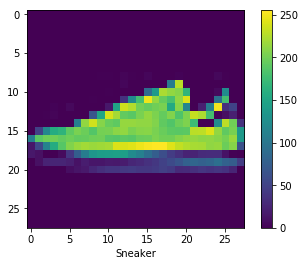

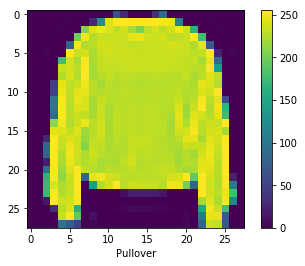

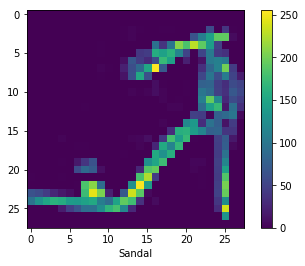

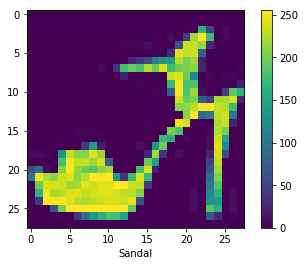

In [57]:
import matplotlib.pyplot as plt

for i in range(0,10): 
  plt.imshow(trainX[i])
  plt.colorbar()
  plt.grid(False)
  plt.xlabel(class_names[trainY[i]])
  plt.show()


In [22]:
trainX.shape

(60000, 28, 28)

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()
#keras.layers.Flatten(input_shape=(28, 28)),
#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.Dense(100, input_shape=(28,)))

#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())
#Add 1st hidden layer
#model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='mse',metrics=['accuracy'])

### Execute the model using model.fit()

In [109]:
model.fit(trainX, trainY, epochs=100)

Epoch 1/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1729 - acc: 0.1347
Epoch 2/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1693 - acc: 0.1533
Epoch 3/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1683 - acc: 0.1579
Epoch 4/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.1668 - acc: 0.1654
Epoch 5/100
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1648 - acc: 0.1757
Epoch 6/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1643 - acc: 0.1779
Epoch 7/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1644 - acc: 0.1778
Epoch 8/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1638 - acc: 0.1805
Epoch 9/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1648 - acc: 0.1757
Epoch 10/100
60000/60000 [==============================] - 3s 53us/sampl

In [0]:
# evaluate the model
model.evaluate(testX, testY, verbose=0)

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()
#keras.layers.Flatten(input_shape=(28, 28)),
#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.Dense(1, input_shape=(28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
#Add 1st hidden layer
#model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])


### Execute the model

In [104]:
model.fit(trainX, trainY, epochs=100,batch_size=100)

Epoch 1/100
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0888 - acc: 0.1487
Epoch 2/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0873 - acc: 0.1894
Epoch 3/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0868 - acc: 0.1933
Epoch 4/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0865 - acc: 0.1951
Epoch 5/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0861 - acc: 0.1953
Epoch 6/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0858 - acc: 0.1963
Epoch 7/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0854 - acc: 0.1964
Epoch 8/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0850 - acc: 0.1968
Epoch 9/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0846 - acc: 0.1972
Epoch 10/100
60000/60000 [==============================] - 1s 14us/sampl

In [110]:
pred = model.predict(testX[1:20])
# evaluate the model
model.evaluate(testX, testY, verbose=0)

[0.14197733678817748, 0.2901]

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from keras.optimizers import SGD
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()
#keras.layers.Flatten(input_shape=(28, 28)),
#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.Dense(1, input_shape=(28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
#Add 1st hidden layer
#model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#Compile the model - add Loss and Gradient Descent optimizer
epochs = 50
learning_rate = 0.001
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [112]:
model.fit(trainX, trainY, epochs=100,batch_size=100)

Epoch 1/100
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3177 - acc: 0.9000
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.3044 - acc: 0.9001
Epoch 3/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2991 - acc: 0.9014
Epoch 4/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2946 - acc: 0.9039
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2908 - acc: 0.9056
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2876 - acc: 0.9063
Epoch 7/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2847 - acc: 0.9067
Epoch 8/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2822 - acc: 0.9068
Epoch 9/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2800 - acc: 0.9069
Epoch 10/100
60000/60000 [==============================] - 1s 16us/sampl

In [0]:
pred = model.predict(testX[1:20])

In [114]:
# evaluate the model
model.evaluate(testX, testY, verbose=0)

[0.2153881709098816, 0.91132003]

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential Graph (model)
model = tf.keras.Sequential()
#keras.layers.Flatten(input_shape=(28, 28)),
#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.Dense(1, input_shape=(28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#Compile the model - add Loss and Gradient Descent optimizer
epochs = 50
learning_rate = 0.03
decay_rate = learning_rate / epochs
momentum = 0.5
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
model.fit(trainX, trainY, epochs=100,batch_size=100)

Epoch 1/100
60000/60000 [==============================] - 1s 16us/sample - loss: 0.2049 - acc: 0.9155
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2046 - acc: 0.9156
Epoch 3/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2055 - acc: 0.9154
Epoch 4/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2042 - acc: 0.9155
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2044 - acc: 0.9155
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2042 - acc: 0.9155
Epoch 7/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2042 - acc: 0.9155
Epoch 8/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2039 - acc: 0.9154
Epoch 9/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.2040 - acc: 0.9155
Epoch 10/100
60000/60000 [==============================] - 1s 15us/sampl

In [0]:
pred = model.predict(testX[1:20])

In [96]:
# evaluate the model
model.evaluate(testX, testY, verbose=0)

[0.19148259258270264, 0.91574]

In [81]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 785       
_________________________________________________________________
batch_normalization_4 (Batch (None, 1)                 4         
_________________________________________________________________
dense_26 (Dense)             (None, 100)               200       
_________________________________________________________________
dense_27 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

## Review model

In [82]:
model.get_weights()

[array([[-8.02533627e-02],
        [-4.30104770e-02],
        [ 3.50208282e-02],
        [-2.61824019e-02],
        [ 4.02152073e-03],
        [-1.86281309e-01],
        [-3.88743490e-01],
        [-4.67380404e-01],
        [-1.22605383e-01],
        [-1.14881985e-01],
        [-1.02996722e-01],
        [-1.04555480e-01],
        [-2.91071951e-01],
        [-3.75723839e-02],
        [ 3.77076924e-01],
        [ 9.46324021e-02],
        [-1.05409093e-01],
        [-1.56474799e-01],
        [-2.00101689e-01],
        [-3.06420654e-01],
        [-3.64845216e-01],
        [-2.80166417e-01],
        [ 1.40530899e-01],
        [ 2.21307501e-01],
        [ 4.50022146e-02],
        [ 4.23019305e-02],
        [ 2.81250803e-03],
        [-5.39271235e-02],
        [ 1.19491303e-02],
        [ 7.90776461e-02],
        [ 7.62024254e-04],
        [-7.57451802e-02],
        [-1.06419317e-01],
        [ 7.06189796e-02],
        [ 5.83455972e-02],
        [ 8.36509839e-02],
        [ 7.72273168e-02],
 

### Run the model

# Model 1 withonly one layer accuracy is 29%

# Model 2 with Batch of 100 and learning rate of 0.01  increased Accuracy to  91.11%

# Model 3 with adding 3 hidden layers with sigmoid function and learning rate of 0.03 increased the accuracy to 91.15% 
